# Processamento de linguagem natural e modelo de an√°lise de sentimento.

A fim de que seja poss√≠vel comparar os t√≥picos abaixo descritos com os itens explicitados pelo barema, encontra-se, nessa c√©lula, um √≠ndice comparativo entre ambas partes. Ele foi feito para facilitar a corre√ß√£o dos professores e permitir a exist√™ncia de uma autonomia na nomenclatura das c√©lulas de organiza√ß√£o.
- Instala√ß√£o -> t√≥pico 1.0
- Testes isolados - >  t√≥pico 3.8
- Defini√ß√£o de fun√ß√µes -> t√≥pico 3.1 a 3.7
- Testes das fun√ß√µes -> t√≥pico 4.3
- An√°lise descritiva -> t√≥pico 2.0
- Pr√© processamento -> t√≥pico 3.0
- Pipeline -> t√≥pico 4.3
- Modelo Bag of words -> t√≥pico 4.0


## 1.0 Instala√ß√£o

Nessa parte do notebook realiza-se a instala√ß√£o das bibliotecas que ser√£o utilizadas no decorrer do c√≥digo, bem como a importa√ß√£o da base de dados que baseia todas as posteriores an√°lises.

### 1.1 Importa√ß√£o das bibliotecas

In [ ]:
# instala√ß√£o de pacotes para remo√ß√£o de acentos
!pip install unidecode
# Instalando biblioteca Python "emoji"
!pip install emoji
# Instala√ß√£o de biblioteca para remo√ß√£o de stop words
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 235.9/235.9 kB 13.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 355.8/355.8 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.0-py2.py3-none-any.whl size=351211 sha256=0699b603a35e5471d447a5c68d27b073e0361eede58d89634a10c823e69aaec9
  Stored in directory: /root/.cache/pip/wheels/2a/0c/2c/07b5af72b120503fe24590691d24c462a25e5e530db8700a96
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
#importa√ß√£o das bibliotecas:
import pandas as pd
import numpy as np
# bibliotecas utilizadas para tokeniza√ß√£o
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
#biblioteca para tokeniza√ß√£o
from keras.preprocessing.text import Tokenizer
# bibliotecas utilizadas para remo√ß√£o de stop words
import nltk
nltk.download('punkt')
#importa√ß√£o das bibliotecas para remo√ß√£o de Stop Words
import spacy
nlp = spacy.cli.download('pt_core_news_sm')
nlp = spacy.load('pt_core_news_sm')
# bibliotecas para remo√ß√£o de acentos
from unidecode import unidecode
# bibliotecas utilizadas para o tratamento de abrevia√ß√µes
import re
# Instalando biblioteca Python "emoji"
import emoji
# importa√ß√£o de biblioteca para exporta√ß√£o do modelo
import pickle
# importa√ß√£o de biblioteca para separar treino e teste
from sklearn.model_selection import train_test_split
# importa√ß√£o do naive Bayes
from sklearn.naive_bayes import GaussianNB
# Importa√ß√£o de bibliotecas para revoca√ß√£o
from sklearn.metrics import recall_score
# importa√ß√£o de bilbioteca para matriz de confus√£o
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# importa√ß√£o de biblioteca para Word2Vec Skipgram
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


‚úî Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


### 1.2 Cria√ß√£o da tabela

In [ ]:
#Conex√£o com o drive
from google.colab import drive
drive.mount('/content/drive')
#importa√ß√£o da base de dados:
df = pd.read_excel('/content/drive/MyDrive/Modulo_6_grupo_1/2-base_10052023-G1.xlsx')
novas_colunas = {
    '"dataPublicada"': 'dataPublicada',
    '"autor"': 'autor',
    '"texto"': 'texto',
    '"sentimento"': 'targetSentimento',
    '"tipoInteracao"': 'tipoInteracao',
    '"anomalia"': 'anomalia',
    '"probabilidadeAnomalia"': 'probabilidadeAnomalia',
    '"linkPost"': 'linkPost',
    '"processado"': 'processado',
    '"contemHyperlink"': 'contemHyperlink'
}

# Renomear as colunas
df = df.rename(columns=novas_colunas)
# Remover linhas sem a coluna "texto"
df = df.dropna(subset=['texto'])
# Filtrar as linhas com base em diferentes condi√ß√µes
df = df[(df['anomalia'] != 1) & (df['autor'] != 'btgpactual') & (df['contemHyperlink'] != 1) & (df['probabilidadeAnomalia'] <= 50)]
# Redefinir o √≠ndice
df = df.reset_index(drop=True)

Mounted at /content/drive


##### Balanceamento dos dados com undersampling

In [ ]:
# # Separa os elementos das classes POSITIVE, NEUTRAL e NEGATIVE em tr√™s tabelas
# df_classe1 = df.loc[df['sentimento'] == "POSITIVE"]
# df_classe2 = df.loc[df['sentimento'] == "NEUTRAL"]
# df_classe3 = df.loc[df['sentimento'] == "NEGATIVE"]

# # Mant√©m 988 elementos nas tabelas df_classe1 e df_classe2
# df_classe1 = df_classe1.sample(n=988, random_state=42)
# df_classe2 = df_classe2.sample(n=988, random_state=42)

# # Concatena as tr√™s tabelas em uma tabela df1
# df1 = pd.concat([df_classe1, df_classe2, df_classe3], ignore_index=True)

In [ ]:
# # Embaralha as linhas da tabela na vari√°vel df
# df = df1.sample(frac=1).reset_index(drop=True)

# # Exibe a tabela resultante
# df['sentimento']

## 2.0 An√°lise descritiva dos dados

A An√°lise Descritiva dos Dados √© uma t√©cnica importante para obter insights e compreender as caracter√≠sticas dos dados sem a utiliza√ß√£o de modelos estat√≠sticos complexos.

Todas as c√©lulas componentes dessa parte do notebook se encontram comentadas devido √† economia de espa√ßo de processamento e acelera√ß√£o do tempo de espera da computa√ß√£o de todas as c√©lulas.

### 2.1 Colunas

C√©lula que permite a visualiza√ß√£o de todas as colunas do dataframe:

In [ ]:
# df.columns


1. **Coluna Id:** A coluna id apresenta o index para visualiza√ß√£o da planilha e pode ser usada como chave prim√°ria do coment√°rio. No que diz respeito √† utiliza√ß√£o no modelo, essa coluna n√£o confere relev√¢ncia para a sua constru√ß√£o, visto que sua utilidade est√° atrelada apenas ao fato de garantir que cada linha possua um identificador √∫nico. Portanto, *essa coluna n√£o ser√° utilizada.*

2. **Coluna dataPublicada:** A coluna data publicada refere-se a data de publica√ß√£o do coment√°rio. Para a constru√ß√£o do modelo **bag of words**, essa coluna n√£o apresenta relev√¢ncia, portanto, *n√£o ser√° utilizada*. Posteriormente, sua utiliza√ß√£o pode se fazer necess√°ria para a averigua√ß√£o dos per√≠odos das campanhas.

3. **Coluna autor:** A coluna autor √© referente √† conta do instagram que realizou o coment√°rio na postagem. Essa coluna n√£o ser√° utilizada diretamente pelo modelo bag of words, mas ser√° importante para o agrupamento de coment√°rios referente √† empresa BTG.

4. **Coluna texto:** A coluna texto se refere ao texto presente no coment√°rio realizado. Para a constru√ß√£o do modelo, essa √© a coluna com maior relev√¢ncia, visto que s√£o justamente os conte√∫dos dos coment√°rios que precisam ser analisados pelo modelo.

5. **Coluna sentimento:** A coluna sentimento √©, justamente, o target da classifica√ß√£o que precisamos fazer dos dados. Essa coluna ser√° utilizada para o treinamento posterior do modelo, visto que apresenta o resultado esperado. Contudo, diante de uma an√°lise manual das classifica√ß√µes, foi poss√≠vel perceber que alguns coment√°rios foram classificados de maneira err√¥nea, dado que possuem um teor positivo mas foram classificados como negativos ou neutros.

6. **Coluna tipoInteracao:** A coluna tipo intera√ß√£o informa o tipo de intera√ß√£o a qual aquele coment√°rio pertence, como, por exemplo, uma resposta ou como marca√ß√£o. Essa coluna, inicialmente, n√£o ser√° utilizada para a constru√ß√£o do modelo bag of words.

7. **Coluna anomalia:**  N√£o possu√≠mos informa√ß√µes suficientes para definir qual √© o significado dessa coluna. Portanto, ainda n√£o pode-se definir se ela ser√° utilizada ou n√£o no decorrer do desenvolvimento do projeto. Por ora, essa coluna n√£o ser√° utilizada.

8. **Coluna probabilidadeAnomalia:**  N√£o possu√≠mos informa√ß√µes suficientes para definir qual √© o significado dessa coluna. Portanto, ainda n√£o pode-se definir se ela ser√° utilizada ou n√£o no decorrer do desenvolvimento do projeto. Por ora, essa coluna n√£o ser√° utilizada.

9. **Coluna linkPost:** Essa coluna possui o link referente a postagem da qual foram retirados os coment√°rios. Todos os coment√°rios referentes √† mesma postagem possuem o link igual. Pensando na an√°lise de sentimento, essa coluna n√£o apresenta relev√¢ncia, portanto, n√£o ser√° utilizada.

10. **Coluna processado:** N√£o possu√≠mos informa√ß√µes suficientes para definir qual √© o significado dessa coluna. Portanto, ainda n√£o pode-se definir se ela ser√° utilizada ou n√£o no decorrer do desenvolvimento do projeto. Por ora, essa coluna n√£o ser√° utilizada.

11. **Coluna contemHyperlink:** N√£o possu√≠mos informa√ß√µes suficientes para definir qual √© o significado dessa coluna. Portanto, ainda n√£o pode-se definir se ela ser√° utilizada ou n√£o no decorrer do desenvolvimento do projeto. Por ora, essa coluna n√£o ser√° utilizada.



### 2.2 Fun√ß√µes

Abaixo est√£o listadas todas as fun√ß√µes presentes nesse notebook e o que elas fazem:
1. **remocaoAcentos:** fun√ß√£o que remove todos os acentos presentes nos coment√°rios da coluna texto.
2. **tratamentoMaiusculas:** fun√ß√£o que trata todas as letras mai√∫sculas dos coment√°rios presentes na coluna texto, passando-as para caixa baixa.
3. **conversaoEmojis:** fun√ß√£o que converte todo emoji presente na coluna texto para seu significado em ingl√™s.
4. **tratamentoAbreviacoes:** fun√ß√£o que converte todas as abrevia√ß√µes para seu significado real, al√©m de remover todas as pontua√ß√µes e diferentes tipos de marca√ß√µes comumente utilizadas em redes sociais.
5. **tokenizacaoPalavra:** fun√ß√£o que tokeniza em palavras os coment√°rios, separando cada uma delas do todo.
6. **tokenizacaoFrase:** fun√ß√£o que tokeniza em frases os coment√°rios, separando cada uma das frases, sejam elas do mesmo coment√°rio ou de coment√°rios diferentes.
7. **remocaoStopWords:** fun√ß√£o que remove todas as stopwords presentes nos coment√°rios da coluna texto.
8. **bagOfWords:** fun√ß√£o para chamar o modelo de bag of words e salvar um vetor de recorrencia.
9. **pipelineBow:** fun√ß√£o que define a pipeline que ser√° utilizada no modelo, com todos os pr√©-processamentos realizados e o modelo BOW aplicado para gerar um dicion√°rio e um vetor.
10. **contarPalavras:** fun√ß√£o para contar quantas vezes cada palavra se repetiu no modelo bag of words.
11. **gerarNuvemPalavras:** fun√ß√£o para gerar uma nuvem de palavras utilizando os resultados do modelo bag of words.

###2.3 Visualiza√ß√£o gr√°fica de dados

#### 2.3.1 Valores nulos

Visualiza√ß√£o da propor√ß√£o entre o n√∫mero de linhas que possuem algum tipo de valor nulo e as linhas que n√£o os possuem.

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # visualizando todos os itens nulos
# print(df.isnull().sum())

# # criando um gr√°fico de barras para comparar os itens nulos e n√£o nulos
# sns.countplot(x=df.isnull().any(axis=1), hue=df.isnull().any(axis=1))
# plt.title("Itens Nulos vs N√£o Nulos")
# plt.xlabel("Itens")
# plt.ylabel("Contagem")
# plt.legend(labels=['Itens com valores n√£o nulos', 'Itens com valores nulos'])
# plt.show()

Visualiza√ß√£o de √≠tens nulos em cada uma das colunas do dataframe:

In [ ]:
# # contando os valores nulos em cada coluna
# null_counts = df.isnull().sum()

# # criando um gr√°fico de barras para mostrar a contagem de valores nulos em cada coluna
# sns.barplot(x=null_counts.index, y=null_counts.values)
# plt.xticks(rotation=90) # adicionando a rota√ß√£o de 90 graus nas legendas

# # adicionando as etiquetas de texto no topo de cada barra
# for i, v in enumerate(null_counts.values):
#     plt.text(i, v+10, str(v), ha='center', fontsize=12)

# # configurando os r√≥tulos dos eixos e o t√≠tulo do gr√°fico
# plt.xlabel("Colunas")
# plt.ylabel("Contagem de Valores Nulos")
# plt.title("Contagem de Valores Nulos por Coluna")

# # exibindo o gr√°fico
# plt.show()

#### 2.2.2 Agrupamento por autores

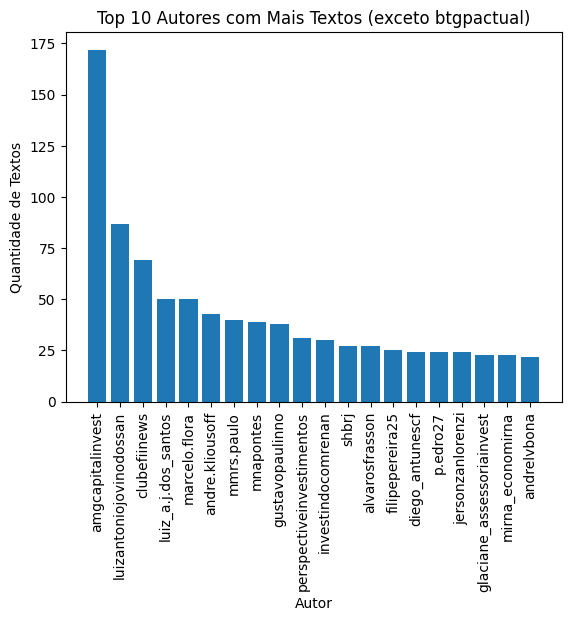

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamento dos textos por autor, excluindo o "btg pactual"
textosPorAutor = df.query("autor != 'btgpactual'").groupby('autor')['texto'].count().reset_index()

# Ordena√ß√£o dos autores por quantidade de textos
textosPorAutor = textosPorAutor.sort_values('texto', ascending=False).reset_index(drop=True)

# Sele√ß√£o dos 10 autores com mais textos
top10Autores = textosPorAutor.head(20)

# Gr√°fico de barras com a quantidade de textos por autor
plt.bar(top10Autores['autor'], top10Autores['texto'])
plt.xticks(rotation=90)
plt.xlabel('Autor')
plt.ylabel('Quantidade de Textos')
plt.title('Top 10 Autores com Mais Textos (exceto btgpactual)')
plt.show()


In [ ]:
df_filtered = df.query("autor == 'amgcapitalinvest'")
df_filtered.head(10)

id          dataPublicada             autor  \
875   382158  "2022-03-24 11:43:00"  amgcapitalinvest   
918   418930  "2022-03-26 10:07:00"  amgcapitalinvest   
921   419736  "2022-03-26 09:38:00"  amgcapitalinvest   
925   438730  "2022-03-27 11:00:00"  amgcapitalinvest   
935   457530  "2022-03-28 10:22:00"  amgcapitalinvest   
995   478755  "2022-03-29 12:58:00"  amgcapitalinvest   
1020  497404  "2022-03-30 12:22:00"  amgcapitalinvest   
1081  516231  "2022-03-31 12:24:00"  amgcapitalinvest   
1131  548030  "2022-04-02 12:12:00"  amgcapitalinvest   
1184  586434  "2022-04-04 12:45:00"  amgcapitalinvest   

                                                  texto targetSentimento  \
875   (link na bio) Enriquecer √© uma quest√£o de esco...         POSITIVE   
918   Hoje, a capital dos ga√∫chos completa 250 anos!...         POSITIVE   
921                Evento Voz Feminina no btgpactual ‚ù£Ô∏è          NEUTRAL   
925   üñ• www.amgcapital.com.br üìß E-mail: contato@amgc...          NEUTRAL   
935   üñ• www.amgcapital.com.br üìß E-mail: contato@amgc...          NEUTRAL   
995   A AMG Capital e o BTG Pactual se juntaram a um...         POSITIVE   
1020  (link na bio) Ao fazer investimentos, voc√™ n√£o...         POSITIVE   
1081  J√° atualizou o seu app BTG Trader? A nova vers...         POSITIVE   
1131  Carteiras recomendadas de Abril no ar üìà  Arras...          NEUTRAL   
1184  (link na bio) Ao fazer investimentos, voc√™ n√£o...         POSITIVE   

     tipoInteracao  anomalia  probabilidadeAnomalia  \
875       marca√ß√£o         0                     49   
918       marca√ß√£o         0                     48   
921       marca√ß√£o         0                     30   
925       marca√ß√£o         0                     44   
935       marca√ß√£o         0                     44   
995       marca√ß√£o         0                     27   
1020      marca√ß√£o         0                     43   
1081      marca√ß√£o         0                     40   
1131      marca√ß√£o         0                     33   
1184      marca√ß√£o         0                     34   

                                       linkPost  processado  contemHyperlink  
875    https://www.instagram.com/p/CbfYbbmsaOS/           0                0  
918    https://www.instagram.com/p/CbkXDKvA0Jj/           0                0  
921    https://www.instagram.com/p/CbkTu61ujFC/           0                0  
925    https://www.instagram.com/p/CbnB5pRqrl6/           0                0  
935    https://www.instagram.com/p/CbpiV-zhBbD/           0                0  
995   https://www.instagram.com/tv/CbsY8bhKHAD/           0                0  
1020   https://www.instagram.com/p/Cbu5pMEKxj6/           0                0  
1081  https://www.instagram.com/tv/CbxeqlbMSYz/           0                0  
1131   https://www.instagram.com/p/Cb2m4YYJzUq/           0                0  
1184   https://www.instagram.com/p/Cb70WBuv4We/           0                0

In [ ]:
df_filtered = df.query("autor == 'clubefiinews'")
df_filtered.head(10)

id          dataPublicada         autor  \
6          8  "2022-03-03 20:02:00"  clubefiinews   
436    96787  "2022-03-09 14:57:00"  clubefiinews   
552   210901  "2022-03-15 13:11:00"  clubefiinews   
557   215305  "2022-03-15 18:40:00"  clubefiinews   
646   255013  "2022-03-17 20:15:00"  clubefiinews   
654   267351  "2022-03-18 11:41:00"  clubefiinews   
819   347558  "2022-03-22 16:27:00"  clubefiinews   
833   361959  "2022-03-23 10:20:00"  clubefiinews   
1005  483603  "2022-03-29 19:14:00"  clubefiinews   
1229  609244  "2022-04-05 17:10:00"  clubefiinews   

                                                  texto targetSentimento  \
6     O Fundo Imobili√°rio Hospital Nossa Senhora de ...         NEGATIVE   
436   O Fundo Imobili√°rio Hospital Nossa Senhora de ...         POSITIVE   
552   O Fundo Imobili√°rio BM Brascan Lajes Corporati...          NEUTRAL   
557   O Fundo Imobili√°rio Torre Norte (TRNT11) assin...          NEUTRAL   
646   "O Fundo Imobili√°rio BTG Pactual Log√≠stica (BT...         POSITIVE   
654   O Fundo Imobili√°rio Torre Almirante (ALMI11) f...          NEUTRAL   
819   O Fundo Imobili√°rio BTG Pactual Log√≠stica (BTL...         POSITIVE   
833   A administradora BTG Pactual e a gestora BlueM...          NEUTRAL   
1005  O Fundo Imobili√°rio VBI Log√≠stico (LVBI11) pag...         POSITIVE   
1229  O Fundo Imobili√°rio Parque Dom Pedro Shopping ...         POSITIVE   

     tipoInteracao  anomalia  probabilidadeAnomalia  \
6         marca√ß√£o         0                     39   
436       marca√ß√£o         0                     36   
552       marca√ß√£o         0                     43   
557       marca√ß√£o         0                     43   
646       marca√ß√£o         0                     29   
654       marca√ß√£o         0                     43   
819       marca√ß√£o         0                     31   
833       marca√ß√£o         0                     27   
1005      marca√ß√£o         0                     27   
1229      marca√ß√£o         0                     38   

                                      linkPost  processado  contemHyperlink  
6     https://www.instagram.com/p/CaqMkFfOgl9/           0                0  
436   https://www.instagram.com/p/Ca5GeHBOJ5X/           0                0  
552   https://www.instagram.com/p/CbIXBJ1ur3t/           0                0  
557   https://www.instagram.com/p/CbI86BFOzO9/           0                0  
646   https://www.instagram.com/p/CbORIPEsx96/           0                0  
654   https://www.instagram.com/p/CbP7HL7Ohju/           0                0  
819   https://www.instagram.com/p/CbavLykuWSj/           0                0  
833   https://www.instagram.com/p/Cbcp57HORy9/           0                0  
1005  https://www.instagram.com/p/CbtDprou6-Q/           0                0  
1229  https://www.instagram.com/p/Cb-3I7xus6W/           0                0

In [ ]:
df_filtered = df.query("autor == 'perspectiveinvestimentos'")
df_filtered.head(10)

id          dataPublicada                     autor  \
1340   741286  "2022-04-12 18:34:00"  perspectiveinvestimentos   
1464   919103  "2022-04-22 10:24:00"  perspectiveinvestimentos   
1585  1004792  "2022-04-27 00:40:00"  perspectiveinvestimentos   
1799  1098869  "2022-05-06 13:56:00"  perspectiveinvestimentos   
2086  1215603  "2022-05-19 10:00:00"  perspectiveinvestimentos   
2245  1274990  "2022-05-25 12:10:00"  perspectiveinvestimentos   
2317  1295132  "2022-05-27 14:29:00"  perspectiveinvestimentos   
2331  1296332  "2022-05-27 17:30:00"  perspectiveinvestimentos   
2705  1402076  "2022-06-07 18:58:00"  perspectiveinvestimentos   
2977  1493403  "2022-06-17 10:38:00"  perspectiveinvestimentos   

                                                  texto targetSentimento  \
1340  Se falou em competitividade, ligar os motores,...         POSITIVE   
1464  J√° se imaginou trabalhando no escrit√≥rio top 2...         POSITIVE   
1585  Pare de sonhar acordado: trabalhar para o escr...         POSITIVE   
1799  N√£o temos nem palavras para expressar o orgulh...         POSITIVE   
2086  O #tbt de hoje √© recente! No clique, nosso hea...         POSITIVE   
2245  Amanh√£ come√ßa a Expo Ind√∫stria Maranh√£o! Produ...          NEUTRAL   
2317  Quem s√≥ v√™ sucesso, n√£o v√™ o esfor√ßo.  Venha c...         POSITIVE   
2331  Parte do nosso time est√° participando do BTG 2...         POSITIVE   
2705  Voc√™ quer mudar de carreira ou fazer parte do ...         POSITIVE   
2977  Mais que assessor: um profissional do escrit√≥r...         POSITIVE   

     tipoInteracao  anomalia  probabilidadeAnomalia  \
1340      marca√ß√£o         0                     48   
1464      marca√ß√£o         0                     36   
1585      marca√ß√£o         0                     48   
1799      marca√ß√£o         0                     36   
2086      marca√ß√£o         0                     41   
2245      marca√ß√£o         0                     38   
2317      marca√ß√£o         0                     29   
2331      marca√ß√£o         0                     22   
2705      marca√ß√£o         0                     38   
2977      marca√ß√£o         0                     48   

                                       linkPost  processado  contemHyperlink  
1340   https://www.instagram.com/p/CcRCjdWJTkg/           0                0  
1464   https://www.instagram.com/p/Ccp3s5SpU_h/           0                0  
1585   https://www.instagram.com/p/Cc1vlftNGyE/           0                0  
1799   https://www.instagram.com/p/CdOV2-FO7cH/           0                0  
2086   https://www.instagram.com/p/CdvZKwPsaGM/           0                0  
2245   https://www.instagram.com/p/Cd_E0d4MNlG/           0                0  
2317  https://www.instagram.com/tv/CeEdqlzjETZ/           0                0  
2331   https://www.instagram.com/p/CeEzBhDsnDw/           0                0  
2705   https://www.instagram.com/p/CehR0OPsQH3/           0                0  
2977   https://www.instagram.com/p/Ce6IkugLKQP/           0                0

In [ ]:
df_filtered = df.query("autor == 'shbrj'")
df_filtered.head(30)

id          dataPublicada  autor  \
2162  1228893  "2022-05-20 18:04:00"  shbrj   
2398  1322828  "2022-05-30 12:01:00"  shbrj   
2672  1392076  "2022-06-06 18:01:00"  shbrj   
2674  1392176  "2022-06-06 18:03:00"  shbrj   
2876  1468476  "2022-06-14 18:04:00"  shbrj   
3392  1639860  "2022-07-04 13:00:00"  shbrj   
5945  2053293  "2022-08-17 18:04:00"  shbrj   
6108  2069591  "2022-08-19 12:05:00"  shbrj   
6613  2229951  "2022-09-05 18:37:00"  shbrj   
6909  2326285  "2022-09-15 20:19:00"  shbrj   
6952  2341585  "2022-09-17 10:41:00"  shbrj   
6968  2351685  "2022-09-18 11:56:00"  shbrj   
6972  2352485  "2022-09-18 13:59:00"  shbrj   
6975  2353685  "2022-09-18 16:53:00"  shbrj   
7018  2371086  "2022-09-20 12:26:00"  shbrj   
7756  2522257  "2022-10-06 12:35:00"  shbrj   
7934  2562813  "2022-10-10 18:53:00"  shbrj   
7956  2570511  "2022-10-11 14:10:00"  shbrj   
8380  2712710  "2022-10-26 12:06:00"  shbrj   
8615  2788779  "2022-11-03 10:07:00"  shbrj   
9062  2923274  "2022-11-17 12:54:00"  shbrj   
9273  2979029  "2022-11-23 12:06:00"  shbrj   
9279  2979901  "2022-11-23 14:26:00"  shbrj   
9313  2988243  "2022-11-24 12:23:00"  shbrj   
9369  3001314  "2022-11-25 23:00:00"  shbrj   
9397  3016740  "2022-11-27 13:42:00"  shbrj   
9445  3035132  "2022-11-29 12:20:00"  shbrj   

                                                  texto targetSentimento  \
2162  Voc√™ j√° garantiu a sua inscri√ß√£o na 3¬™ Etapa d...         POSITIVE   
2398  üèÜ Resultado da 3¬™ Etapa do Ranking SHB 22  28 ...          NEUTRAL   
2672  "4¬™ Etapa do Ranking SHB 2022  Resultados do d...          NEUTRAL   
2674  "4¬™ Etapa do Ranking SHB 2022  Resultados do d...          NEUTRAL   
2876  As provas do Concurso de Saltos Santa Cec√≠lia ...         POSITIVE   
3392  Esse final de semana aconteceu a 5¬™ Etapa do R...          NEUTRAL   
5945  Falta menos de um m√™s para a Copa Sabemi e as ...         POSITIVE   
6108  A 6¬™ Etapa do Ranking SHB acontecer√° no final ...         POSITIVE   
6613  Esse final de semana aconteceu a 6¬™ Etapa do R...          NEUTRAL   
6909  Nem mesmo a chuva ofusca o brilhantismo dos ca...          NEUTRAL   
6952  Muita emo√ß√£o nas provas acirradas da Copa Sabe...         POSITIVE   
6968  A noite de s√°bado da Copa Sabemi encerrou com ...          NEUTRAL   
6972  Mesmo debaixo de muita chuva, os atletas da Co...         NEGATIVE   
6975  E temos mais resultados espetaculares do √∫ltim...          NEUTRAL   
7018  Assim ficou a Classifica√ß√£o da 2¬™ Etapa do Gra...          NEUTRAL   
7756  J√° que hoje √© quinta-feira, vamos de #tbt dess...         POSITIVE   
7934  Confira abaixo o resultado das provas de s√°bad...          NEUTRAL   
7956  Os atletas da 7¬∫ Etapa do Ranking deram show e...          NEUTRAL   
8380  Falta pouco para o CSI-W e o CSN 84¬∫ Anivers√°r...         POSITIVE   
8615  Falta pouco para o CSI-W e o CSN 84¬∫ Anivers√°r...         POSITIVE   
9062  No 84¬∫ Anivers√°rio da Sociedade H√≠pica Brasile...         POSITIVE   
9273  Legenda: Aten√ß√£o! O hor√°rio de algumas provas ...         NEGATIVE   
9279  Montagem ‚úÖ Inspe√ß√£o veterin√°ria ‚úÖ Estruturas ‚úÖ...          NEUTRAL   
9313  Vamos aos resultados do primeiro dia do nosso ...          NEUTRAL   
9369  Confira alguns cliques do dia das provas 4 a 1...          NEUTRAL   
9397  Hoje a partir das 19hrs n√£o perca o GRANDE PR√ä...         POSITIVE   
9445  Nosso domingo foi marcado por momentos de muit...          NEUTRAL   

     tipoInteracao  anomalia  probabilidadeAnomalia  \
2162      marca√ß√£o         0                     40   
2398      marca√ß√£o         0                     45   
2672      marca√ß√£o         0                     47   
2674      marca√ß√£o         0                     38   
2876      marca√ß√£o         0                     50   
3392      marca√ß√£o         0                     44   
5945      marca√ß√£o         0                     49   
6108      marca√ß√£o         0                     48   
6613 

In [ ]:
df_filtered = df.query("autor == 'alvarosfrasson'")
df_filtered.head(30)

id          dataPublicada           autor  \
108       147  "2022-02-24 16:18:00"  alvarosfrasson   
130       173  "2022-02-23 21:47:00"  alvarosfrasson   
1324   716681  "2022-04-11 10:36:00"  alvarosfrasson   
1353   758850  "2022-04-13 18:00:00"  alvarosfrasson   
1419   851873  "2022-04-18 18:09:00"  alvarosfrasson   
2580  1353251  "2022-06-02 16:09:00"  alvarosfrasson   
3327  1625639  "2022-07-01 10:28:00"  alvarosfrasson   
3351  1628859  "2022-07-01 18:31:00"  alvarosfrasson   
4036  1718060  "2022-07-12 17:19:00"  alvarosfrasson   
4151  1726827  "2022-07-13 15:45:00"  alvarosfrasson   
4281  1736917  "2022-07-14 20:48:00"  alvarosfrasson   
5131  1858188  "2022-07-27 14:31:00"  alvarosfrasson   
5266  1903847  "2022-08-01 15:17:00"  alvarosfrasson   
6243  2109328  "2022-08-23 19:44:00"  alvarosfrasson   
6339  2128228  "2022-08-25 19:37:00"  alvarosfrasson   
6501  2190496  "2022-09-01 15:40:00"  alvarosfrasson   
6700  2264820  "2022-09-09 10:31:00"  alvarosfrasson   
6889  2323185  "2022-09-15 12:31:00"  alvarosfrasson   
7317  2447850  "2022-09-28 14:43:00"  alvarosfrasson   
7319  2447948  "2022-09-28 14:59:00"  alvarosfrasson   
8029  2599941  "2022-10-14 16:28:00"  alvarosfrasson   
8477  2734006  "2022-10-28 17:20:00"  alvarosfrasson   
8621  2790479  "2022-11-03 14:22:00"  alvarosfrasson   
8672  2800280  "2022-11-04 14:56:00"  alvarosfrasson   
8965  2866474  "2022-11-11 14:17:00"  alvarosfrasson   
9045  2913974  "2022-11-16 13:45:00"  alvarosfrasson   
9353  2999313  "2022-11-25 17:28:00"  alvarosfrasson   

                                                  texto targetSentimento  \
108   Impactos nos mercados em raz√£o do conflito ent...         POSITIVE   
130   Segundo dia do CEO Conference foi um verdadeir...         POSITIVE   
1324  No √∫ltimo final de semana, tive o prazer de pa...         POSITIVE   
1353  O c√¢mbio furou consistentemente o piso de R$5,...         POSITIVE   
1419  O aumento significativo nos pre√ßos dos bens e ...         NEGATIVE   
2580  Um breve resumo do cen√°rio macro. Arraste pro ...         POSITIVE   
3327  J√° est√° dispon√≠vel o nosso relat√≥rio de estrat...          NEUTRAL   
3351  H√° tr√™s anos eu embarquei numa jornada profiss...         POSITIVE   
4036  Um pouco do que rolou na 2¬™ edi√ß√£o do BTG Talk...         POSITIVE   
4151  Para o cen√°rio de infla√ß√£o no Brasil, o IPCA d...          NEUTRAL   
4281  Conversei com a excelente marinahelenabr sobre...         POSITIVE   
5131  Um daqueles dias bacanas que o btgpactual nos ...         POSITIVE   
5266  √â hora de conferir um overview do cen√°rio macr...          NEUTRAL   
6243  #Repost btgpactual with use.repost „Éª„Éª„Éª Na sema...         POSITIVE   
6339  O cen√°rio de juros nos EUA ainda est√° em abert...          NEUTRAL   
6501  Relat√≥rio de estrat√©gia de aloca√ß√£o no ar!  
A...          NEUTRAL   
6700  Passando para compartilhar com voc√™s parte de ...         POSITIVE   
6889  O Governing Council do BCE decidiu por elevar ...          NEUTRAL   
7317  Compartilho com voc√™s a an√°lise feita pelo tim...          NEUTRAL   
7319  Compartilho com voc√™s a an√°lise feita pelo tim...          NEUTRAL   
8029  "No cen√°rio da pol√≠tica monet√°ria, avaliamos q...          NEUTRAL   
8477  Passando para compartilhar com voc√™s a minha c...         NEGATIVE   
8621  Passando para compartilhar com voc√™s o caf√© da...         POSITIVE   
8672  J√° est√° dispon√≠vel o relat√≥rio de estrat√©gia d...          NEUTRAL   
8965  Nosso modelo alternativo de alta frequ√™ncia, q...         POSITIVE   
9045  Encontro do Partido Comunista Chin√™s confirmou...          NEUTRAL   
9353  O IPCA-15 de novembro registrou acelera√ß√£o par...          NEUTRAL   

     tipoInteracao  anomalia  probabilidadeAnomalia  \
108       marca√ß√£o         0                     28   
130       marca√ß√£o         0                     49   
1324      marca√ß√£o         0                     38   
1353      marca√ß√£o         0      

In [ ]:
df_filtered = df.query("autor == 'glaciane_assessoriainvest'")
df_filtered.head(30)

id          dataPublicada                      autor  \
4880  1801625  "2022-07-21 17:43:00"  glaciane_assessoriainvest   
5229  1881308  "2022-07-30 05:53:00"  glaciane_assessoriainvest   
5263  1902685  "2022-08-01 12:18:00"  glaciane_assessoriainvest   
5280  1910196  "2022-08-02 08:00:00"  glaciane_assessoriainvest   
5530  1975634  "2022-08-09 12:38:00"  glaciane_assessoriainvest   
5543  1975652  "2022-08-09 08:19:00"  glaciane_assessoriainvest   
5664  2002564  "2022-08-12 10:32:00"  glaciane_assessoriainvest   
5914  2043790  "2022-08-16 18:17:00"  glaciane_assessoriainvest   
6219  2106630  "2022-08-23 12:32:00"  glaciane_assessoriainvest   
6349  2133773  "2022-08-26 09:51:00"  glaciane_assessoriainvest   
6358  2135769  "2022-08-26 15:39:00"  glaciane_assessoriainvest   
6492  2189309  "2022-09-01 12:38:00"  glaciane_assessoriainvest   
6600  2229456  "2022-09-05 17:20:00"  glaciane_assessoriainvest   
6702  2265119  "2022-09-09 11:23:00"  glaciane_assessoriainvest   
6897  2324185  "2022-09-15 15:14:00"  glaciane_assessoriainvest   
7026  2371486  "2022-09-20 13:23:00"  glaciane_assessoriainvest   
7530  2493215  "2022-10-03 11:11:00"  glaciane_assessoriainvest   
7571  2502244  "2022-10-04 10:04:00"  glaciane_assessoriainvest   
8524  2760979  "2022-10-31 12:44:00"  glaciane_assessoriainvest   
8865  2848335  "2022-11-09 16:53:00"  glaciane_assessoriainvest   
8972  2867459  "2022-11-11 16:59:00"  glaciane_assessoriainvest   
9188  2960396  "2022-11-21 12:08:00"  glaciane_assessoriainvest   
9236  2971132  "2022-11-22 15:30:00"  glaciane_assessoriainvest   

                                                  texto targetSentimento  \
4880  #Repost btgpactual with use.repost „Éª„Éª„Éª A CSN M...         NEGATIVE   
5229  Melhor Morning Call do Brasil! De segunda a se...         POSITIVE   
5263  #Repost btgpactual with use.repost „Éª„Éª„Éª Carteir...          NEUTRAL   
5280  #Repost alvarosfrasson with use.repost „Éª„Éª„Éª √â h...          NEUTRAL   
5530  #Repost btgpactual with use.repost „Éª„Éª„Éª O BTG P...         POSITIVE   
5543  Quem gostaria de chegar em um momento da vida ...         POSITIVE   
5664  #Repost btgpactual with use.repost „Éª„Éª„Éª Mais um...          NEUTRAL   
5914  #Repost btgpactual with use.repost „Éª„Éª„Éª Conhe√ßa...         POSITIVE   
6219  #Repost btgpactual with use.repost „Éª„Éª„Éª Nos √∫lt...          NEUTRAL   
6349  #Repost alvarosfrasson with use.repost „Éª„Éª„Éª O c...          NEUTRAL   
6358  #Repost btgpactualempresas with use.repost „Éª„Éª„Éª...          NEUTRAL   
6492  #Repost btgpactual with use.repost „Éª„Éª„Éª Carteir...          NEUTRAL   
6600  #Repost btgpactual with use.repost „Éª„Éª„Éª Voc√™ sa...         POSITIVE   
6702  #Repost alvarosfrasson with use.repost „Éª„Éª„Éª Pas...          NEUTRAL   
6897  #Repost alvarosfrasson with use.repost „Éª„Éª„Éª O G...          NEUTRAL   
7026  #Repost btgpactual with use.repost „Éª„Éª„Éª Voc√™ j√°...          NEUTRAL   
7530  #Repost btgpactual with use.repost „Éª„Éª„Éª Carteir...          NEUTRAL   
7571  #Repost btgpactual with use.repost „Éª„Éª„Éª Voc√™ qu...          NEUTRAL   
8524  #Repost jersonzanlorenzi with use.repost „Éª„Éª„Éª O...         NEGATIVE   
8865  #Repost btgpactual with use.repost „Éª„Éª„Éª O BTG P...          NEUTRAL   
8972  #Repost jersonzanlorenzi with use.repost „Éª„Éª„Éª O...          NEUTRAL   
9188  #Repost btgpactual with use.repost „Éª„Éª„Éª Nesta B...          NEUTRAL   
9236  #Repost btgpactual with use.repost „Éª„Éª„Éª Quando ...         POSITIVE   

     tipoInteracao  anomalia  probabilidadeAnomalia  \
4880      marca√ß√£o         0                     37   
5229      marca√ß√£o         0                     28   
5263      marca√ß√£o         0                     45   
5280      marca√ß√£o         0                     49   
5530      marca√ß√£o         0                     39   
5543      marca√ß√£o         0                     34   
5664      marca√ß√£o         0                 

In [ ]:
# Lista de autores a serem removidos
autores_remover = ['amgcapitalinvest', 'clubefiinews', 'perspectiveinvestimentos', 'shbrj', 'alvarosfrasson', 'glaciane_assessoriainvest']
# Filtrar e remover as linhas com os autores especificados
df = df[~df['autor'].isin(autores_remover)]
df

id          dataPublicada            autor  \
0           2  "2022-03-04 09:29:00"    winthegame_of   
1           3  "2022-03-04 09:20:00"       marta_bego   
2           4  "2022-03-04 08:36:00"       lmviapiana   
3           5  "2022-03-03 21:10:00"     vanilson_dos   
4           6  "2022-03-03 20:54:00"      ricktolledo   
...       ...                    ...              ...   
9480  3042412  "2022-11-30 07:57:00"   marcinho_sousa   
9482  3043812  "2022-11-30 11:27:00"   eduardocolares   
9483  3044012  "2022-11-30 12:00:00"        danielucm   
9485  3044412  "2022-11-30 12:50:00"  moinho_cultural   
9486  3045012  "2022-11-30 14:27:00"        bfmarilia   

                                                  texto targetSentimento  \
0     A Alvarez & Marsal estar√° conosco no Sportainm...          NEUTRAL   
1     #Repost btgpactual with make_repost „Éª„Éª„Éª Entend...          NEUTRAL   
2                                  Minuto touro de ouro         POSITIVE   
3                                      @ricktolledo Sim          NEUTRAL   
4     Queria saber se a Btg banking √© a pr√≥pria btg ...         POSITIVE   
...                                                 ...              ...   
9480  @btgpactual  s√©rio isso ? S√≥ menos informados ...         NEGATIVE   
9482               Atendam o telefone pelo amor de Deus         POSITIVE   
9483  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...         POSITIVE   
9485  "üëâGUADAKAN est√° chegando!!!!  A aula p√∫blica e...          NEUTRAL   
9486  @btgpactual pq o morning call n√£o est√° mais ap...         NEGATIVE   

     tipoInteracao  anomalia  probabilidadeAnomalia  \
0         marca√ß√£o         0                     43   
1         marca√ß√£o         0                     45   
2       coment√°rio         0                     38   
3         resposta         0                     17   
4       coment√°rio         0                     20   
...            ...       ...                    ...   
9480    coment√°rio         0                     28   
9482    coment√°rio         0                     28   
9483      marca√ß√£o         0                     44   
9485      marca√ß√£o         0                     43   
9486    coment√°rio         0                     28   

                                               linkPost  processado  \
0              https://www.instagram.com/p/CarpQUluh7z/           0   
1              https://www.instagram.com/p/CaroK9Nu8tC/           0   
2     https://www.instagram.com/p/CapXhB5Lvas/#17977...           0   
3     https://www.instagram.com/p/CapXhB5Lvas/#17842...           0   
4     https://www.instagram.com/p/CapXhB5Lvas/#17935...           0   
...                                                 ...         ...   
9480  https://www.instagram.com/p/CljbgSRuc33/#18031...           0   
9482  https://www.instagram.com/p/CllkSBOuKlJ/#17960...           0   
9483           https://www.instagram.com/p/Cllt7_nOTBc/           0   
9485        https://www.instagram.com/reel/ClluX-cAoaf/           0   
9486  https://www.instagram.com/p/CllkSBOuKlJ/#17975...           0   

      contemHyperlink  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
9480                0  
9482                0  
9483                0  
9485                0  
9486                0  

[9138 rows x 11 columns]

In [ ]:
def remover_linhas_com_texto(df, texto):
    df = df[~df['texto'].str.contains(texto)]
    return df

# Remover linhas com a palavra "repost" no texto
df = remover_linhas_com_texto(df, '#repost')
df = remover_linhas_com_texto(df, '#Repost')
df = remover_linhas_com_texto(df, 'flamengo')
df = remover_linhas_com_texto(df, 'fluzao')
df = remover_linhas_com_texto(df, 'flu')
df = remover_linhas_com_texto(df, 'palmeiras')
df

id          dataPublicada               autor  \
0           2  "2022-03-04 09:29:00"       winthegame_of   
2           4  "2022-03-04 08:36:00"          lmviapiana   
3           5  "2022-03-03 21:10:00"        vanilson_dos   
4           6  "2022-03-03 20:54:00"         ricktolledo   
5           7  "2022-03-03 20:21:00"  donadabolsaoficial   
...       ...                    ...                 ...   
9480  3042412  "2022-11-30 07:57:00"      marcinho_sousa   
9482  3043812  "2022-11-30 11:27:00"      eduardocolares   
9483  3044012  "2022-11-30 12:00:00"           danielucm   
9485  3044412  "2022-11-30 12:50:00"     moinho_cultural   
9486  3045012  "2022-11-30 14:27:00"           bfmarilia   

                                                  texto targetSentimento  \
0     A Alvarez & Marsal estar√° conosco no Sportainm...          NEUTRAL   
2                                  Minuto touro de ouro         POSITIVE   
3                                      @ricktolledo Sim          NEUTRAL   
4     Queria saber se a Btg banking √© a pr√≥pria btg ...         POSITIVE   
5     Com o in√≠cio da guerra entre R√∫ssia e Ucr√¢nia,...         NEGATIVE   
...                                                 ...              ...   
9480  @btgpactual  s√©rio isso ? S√≥ menos informados ...         NEGATIVE   
9482               Atendam o telefone pelo amor de Deus         POSITIVE   
9483  Voc√™ sabe quais s√£o os 10 maiores FIIs do merc...         POSITIVE   
9485  "üëâGUADAKAN est√° chegando!!!!  A aula p√∫blica e...          NEUTRAL   
9486  @btgpactual pq o morning call n√£o est√° mais ap...         NEGATIVE   

     tipoInteracao  anomalia  probabilidadeAnomalia  \
0         marca√ß√£o         0                     43   
2       coment√°rio         0                     38   
3         resposta         0                     17   
4       coment√°rio         0                     20   
5         marca√ß√£o         0                     46   
...            ...       ...                    ...   
9480    coment√°rio         0                     28   
9482    coment√°rio         0                     28   
9483      marca√ß√£o         0                     44   
9485      marca√ß√£o         0                     43   
9486    coment√°rio         0                     28   

                                               linkPost  processado  \
0              https://www.instagram.com/p/CarpQUluh7z/           0   
2     https://www.instagram.com/p/CapXhB5Lvas/#17977...           0   
3     https://www.instagram.com/p/CapXhB5Lvas/#17842...           0   
4     https://www.instagram.com/p/CapXhB5Lvas/#17935...           0   
5              https://www.instagram.com/p/CaqPAzlObCu/           0   
...                                                 ...         ...   
9480  https://www.instagram.com/p/CljbgSRuc33/#18031...           0   
9482  https://www.instagram.com/p/CllkSBOuKlJ/#17960...           0   
9483           https://www.instagram.com/p/Cllt7_nOTBc/           0   
9485        https://www.instagram.com/reel/ClluX-cAoaf/           0   
9486  https://www.instagram.com/p/CllkSBOuKlJ/#17975...           0   

      contemHyperlink  
0                   0  
2                   0  
3                   0  
4                   0  
5                   0  
...               ...  
9480                0  
9482                0  
9483                0  
9485                0  
9486                0  

[8877 rows x 11 columns]

### 2.4 An√°lise dos sentimentos

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Contar a quantidade de dados para cada combina√ß√£o de marca√ß√£o e tipo de intera√ß√£o
# contagem = df.groupby(['tipoInteracao', 'targetSentimento']).size().unstack(fill_value=0)

# # Criar o gr√°fico de barras agrupadas
# contagem.plot(kind='bar', stacked=True)

# # Configurar os r√≥tulos dos eixos
# plt.xlabel('Tipo de Intera√ß√£o')
# plt.ylabel('Quantidade de Dados')

# # Exibir o gr√°fico
# plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Contar a quantidade de dados para cada combina√ß√£o de marca√ß√£o e tipo de intera√ß√£o
# contagem = df.groupby(['tipoInteracao', 'targetSentimento']).size().unstack(fill_value=0)

# # Cores das colunas
# cores = [ '#FF0000', '#C0C0C0', '#008000']

# # Criar o gr√°fico de barras agrupadas com as cores personalizadas
# contagem.plot(kind='bar', stacked=True, color=cores)

# # Configurar os r√≥tulos dos eixos
# plt.xlabel('Tipo de Intera√ß√£o')
# plt.ylabel('Quantidade de Dados')

# # Exibir o gr√°fico
# plt.show()


## 6.0 Modelos

### 6.4 Rede Neural com Transformers Sentence Embedding

In [ ]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 86.0/86.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.2/7.2 MB 89.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 64.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 236.8/236.8 kB 25.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 102.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sentence_transformers import SentenceTransformer

In [ ]:
#Importa biblioteca keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
import seaborn as sns

In [ ]:
model = SentenceTransformer('distiluse-base-multilingual-cased')

In [ ]:
sentimento_trasformers = pd.DataFrame(df['targetSentimento'])

In [ ]:
# Calcula os embeddings para a coluna de senten√ßas
embeddings_liz = model.encode(df['texto'].tolist())

# Cria um novo DataFrame com os embeddings
embeddings_df = pd.DataFrame(embeddings_liz)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#inicializa o oversampler
oversampler = RandomOverSampler(random_state=42)

#aplica o oversampling nos dado
embeddings_df, sentimento_trasformers = oversampler.fit_resample(embeddings_df, sentimento_trasformers)

In [ ]:
#setando valores para positivo, neutro e negativo
sentimento_trasformers = sentimento_trasformers.replace({'POSITIVE': 0,'NEUTRAL': 1, 'NEGATIVE': 2})

In [ ]:
#Divis√£o entre treinamento e teste
previsores_treinamento_trasformers, previsores_teste_trasformers, classe_treinamento_trasformers, classe_teste_trasformers = train_test_split(embeddings_df, sentimento_trasformers, test_size=0.25)

In [ ]:
classe_treinamento_trasformers.value_counts()

targetSentimento
0                   3004
2                   2994
1                   2941
dtype: int64

In [ ]:
classe_treinamento_trasformers = to_categorical(classe_treinamento_trasformers, num_classes=3)
classe_teste_trasformers = to_categorical(classe_teste_trasformers, num_classes=3)

In [ ]:
#Defini√ß√£o do modelo sequencial
classificador_trasformers = Sequential()

#adi√ß√£o da camada densa com 256 unidades, ativa√ß√£o relu e inicializa√ß√£o normal dos pesos
classificador_trasformers.add(Dense(units = 256, activation = "relu",
                        kernel_initializer = 'normal', input_dim = 512))

#Adi√ß√£o da camada densa com 3 unidades de sa√≠da
classificador_trasformers.add(Dense(units = 3, activation = 'softmax'))

##compila√ß√£o do modelo com o otimizador Adam, a fun√ß√£o de perda categorical e m√©trica de avalia√ß√£o acur√°cia
classificador_trasformers.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                      metrics = ['accuracy'])

In [ ]:
previsores_treinamento_trasformers

0         1         2         3         4         5         6    \
5700   0.013599 -0.003466 -0.027660 -0.032529 -0.017321  0.020442 -0.001929   
11879 -0.019901 -0.023110  0.039475  0.010486  0.037265 -0.030870  0.003149   
7488   0.021594  0.010494  0.030019 -0.012239 -0.031831  0.029334  0.002310   
10806  0.002189  0.004581  0.001930  0.005388 -0.034442  0.005539 -0.020996   
6767  -0.000056  0.023125 -0.006212 -0.032774  0.071973 -0.001246  0.000531   
...         ...       ...       ...       ...       ...       ...       ...   
2166   0.000833  0.029235  0.017023 -0.009937  0.079074  0.004409 -0.046979   
2843  -0.028641 -0.045136 -0.016038 -0.020193 -0.017333 -0.041317  0.018855   
5743   0.013599 -0.003466 -0.027660 -0.032529 -0.017321  0.020442 -0.001929   
5261   0.013599 -0.003466 -0.027660 -0.032529 -0.017321  0.020442 -0.001929   
6489  -0.011736 -0.015450 -0.004288  0.019236 -0.009053  0.012780  0.039874   

            7         8         9    ...       502       503       504  \
5700  -0.032666 -0.016459  0.000230  ...  0.007016  0.001134  0.012586   
11879 -0.000849 -0.035535  0.001553  ... -0.027434  0.056455  0.023869   
7488   0.036198  0.002363  0.002441  ...  0.126217  0.012627  0.032861   
10806  0.015562 -0.000798  0.007066  ...  0.077380  0.017992  0.065426   
6767   0.009385 -0.009044  0.018617  ...  0.128030 -0.021162 -0.006058   
...         ...       ...       ...  ...       ...       ...       ...   
2166   0.016688 -0.019995  0.010308  ...  0.028059 -0.027450  0.009753   
2843  -0.047824  0.012459  0.003763  ... -0.000955  0.037704  0.007461   
5743  -0.032666 -0.016459  0.000230  ...  0.007016  0.001134  0.012586   
5261  -0.032666 -0.016459  0.000230  ...  0.007016  0.001134  0.012586   
6489  -0.008430  0.024196 -0.005025  ...  0.089784 -0.004309  0.022630   

            505       506       507       508       509       510       511  
5700   0.013148 -0.004575 -0.022408  0.000967 -0.004490  0.004567 -0.018769  
11879  0.009389 -0.048109  0.012850 -0.062691 -0.004742 -0.049174  0.033474  
7488  -0.010025  0.004330  0.036491 -0.015871 -0.007929  0.023959  0.009436  
10806 -0.022264 -0.008376 -0.027461 -0.043847  0.016907 -0.015662  0.018081  
6767   0.007373  0.005300 -0.027618 -0.013104 -0.012240 -0.020238  0.034015  
...         ...       ...       ...       ...       ...       ...       ...  
2166  -0.017936  0.032353  0.013383  0.029390 -0.034326  0.012781  0.000790  
2843   0.112050 -0.005807  0.009219  0.001510 -0.020738 -0.034842  0.055714  
5743   0.013148 -0.004575 -0.022408  0.000967 -0.004490  0.004567 -0.018769  
5261   0.013148 -0.004575 -0.022408  0.000967 -0.004490  0.004567 -0.018769  
6489  -0.059147  0.003172  0.012067  0.002928 -0.042144 -0.034459 -0.030698  

[8939 rows x 512 columns]

In [ ]:
#cria um objeto para monitorar a perda de valida√ß√£o(valloss) durante o treinamento
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

#treina o modelo de rede neural com os dados de treinamento e valida√ß√£o utilizando EarlyStopping
classificador_trasformers.fit(previsores_treinamento_trasformers, classe_treinamento_trasformers,
                  validation_data=(previsores_teste_trasformers, classe_teste_trasformers),
                  epochs=100, callbacks=[early_stopping])

Epoch 1/100
280/280 [==============================] - 3s 7ms/step - loss: 0.6491 - accuracy: 0.7395 - val_loss: 0.5401 - val_accuracy: 0.7802
Epoch 2/100
280/280 [==============================] - 1s 5ms/step - loss: 0.5011 - accuracy: 0.8021 - val_loss: 0.5063 - val_accuracy: 0.7966
Epoch 3/100
280/280 [==============================] - 2s 5ms/step - loss: 0.4633 - accuracy: 0.8179 - val_loss: 0.4947 - val_accuracy: 0.8017
Epoch 4/100
280/280 [==============================] - 2s 5ms/step - loss: 0.4334 - accuracy: 0.8328 - val_loss: 0.4846 - val_accuracy: 0.8020
Epoch 5/100
280/280 [==============================] - 2s 6ms/step - loss: 0.4097 - accuracy: 0.8430 - val_loss: 0.4840 - val_accuracy: 0.8114
Epoch 6/100
280/280 [==============================] - 2s 6ms/step - loss: 0.3808 - accuracy: 0.8538 - val_loss: 0.4690 - val_accuracy: 0.8205
Epoch 7/100
280/280 [==============================] - 2s 8ms/step - loss: 0.3532 - accuracy: 0.8670 - val_loss: 0.4639 - val_accuracy: 0.8188

#### Resultados

In [ ]:
def compararTreinoTeste(classificador_trasformers):
    train_acc = classificador_trasformers.history['accuracy']
    val_acc = classificador_trasformers.history['val_accuracy']

    # Plotar gr√°fico de acur√°cia
    epochs = range(1, len(train_acc) + 1)
    plt.plot(epochs, train_acc, 'b', label='Acur√°cia - Treinamento')
    plt.plot(epochs, val_acc, 'r', label='Acur√°cia - Teste')
    plt.title('Curva de Acur√°cia - Treinamento e Teste')
    plt.xlabel('√âpocas')
    plt.ylabel('Acur√°cia')
    plt.legend()
    plt.show()

In [ ]:
previsoes_trasformers = classificador_trasformers.predict(previsores_teste_trasformers)
previsoes_trasformers = np.argmax(previsoes_trasformers, axis=1)

# Converter os alvos verdadeiros para inteiros
classe_teste_int = np.argmax(classe_teste_trasformers, axis=1)

# Criar a matriz de confus√£o
matrizTransformers = confusion_matrix(classe_teste_int, previsoes_trasformers)
report = classification_report(classe_teste_int, previsoes_trasformers, output_dict=True)

acuraciaTranformers = report['weighted avg']['precision']
revocacaoTranformers = report['weighted avg']['recall']


94/94 [==============================] - 0s 2ms/step


#### Exporta√ß√£o do modelo

In [ ]:
# Salve o modelo de Rede neural com Transformers em um arquivo PKL
with open('modelo_rede_neural_Transformers.pkl', 'wb') as arquivo:
    pickle.dump(classificador_trasformers, arquivo)

## 7.0 Compara√ß√£o de resultados.

### 7.1 M√©tricas utilizadas para avalia√ß√£o dos modelos

Para avaliar os modelos e comparar sua performance e desempenho, foram utilizadas duas m√©tricas a partir dos resultados obtidos: acur√°cia e revoca√ß√£o. Al√©m dessas, foi utilizada uma matriz de confus√£o para a representa√ß√£o visual dos erros e acertos que os modelos tiveram.

Um exemplo de matriz de confus√£o pode ser visto a seguir:


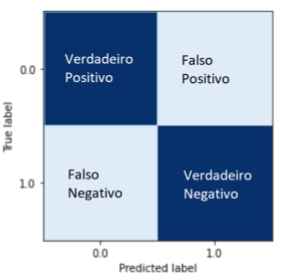

Ap√≥s a classifica√ß√£o dos elementos a partir dos modelos classificat√≥rios, os resultados s√£o colocados em quatro diferentes quadrantes. Na diagonal principal (em azul escuro) est√£o os valores corretamente classificados, com Verdadeiros Positivos (VP) e Verdadeiros Negativos (VN). Fora dessa diagonal se encontram os erros cometidos, os Falsos Positivos (FN) e Falsos Negativos(FN) (Franceschi, 2019).

A partir dos valores obtidos nos quadrantes, outras m√©tricas podem ser extra√≠das, como a acur√°cia, com a seguinte f√≥rmula:


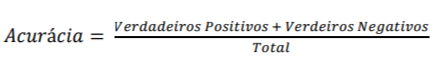

A acur√°cia √© uma m√©trica simples que utiliza a raz√£o entre todos os acertos do modelo (Verdadeiros Positivos e Verdadeiros Negativos) sobre a quantidade total de elementos usados na predi√ß√£o, ou seja, VP somado com VN, FP e FN.
E como a f√≥rmula n√£o utiliza um peso aplicado, √© importante ressaltar que apenas utilizando a acur√°cia n√£o √© poss√≠vel avaliar o desempenho dos modelos (Chen, et al, 2020).

### 7.2 Resultados

In [ ]:
#Criando dataframe para os resultados gerados pelos modelos
dadosResultado = {
    'Acuracia': [ acuraciaTranformers],
    'Revoca√ß√£o': [revocacaoTranformers],
}
nomesLinhas = ['Tranformers']

tabelaResultados = pd.DataFrame(dadosResultado, index=nomesLinhas)

In [ ]:
print(acuraciaTranformers)
print(revocacaoTranformers)

0.8572883931554639
0.8570469798657718


In [ ]:
#Visualiza√ß√£o dos resultados
tabelaResultados

Acuracia  Revoca√ß√£o
Tranformers  0.857288   0.857047

Como foi possivel observar acima, foram feitos 3 modelos para utiliza√ß√£o dos resultados de BOW e do Word2Vec. Sendo eles:

1.   6.1 - Naive Bayes bag of words, com 0.72 de acur√°cia.
2.   6.2 - Naive Bayes Word2Vec, com 0.5 de acur√°cia.
1.   6.3 - Rede Neural Word2Vec, com 0.649 de acur√°cia.


Vale mencionar que a principal metrica utilizada para medir o desenpenho dos modelo foi a acur√°cia.

### 7.3 Matrizes de confus√£o

Abaixo esta a fun√ß√£o utilizada para plotar as matrizes:

In [ ]:
def plotarMatriz(matriz,cor):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt="d", cmap=cor)
    plt.title("Matriz de Confus√£o")
    plt.xlabel(" valor previsto")
    plt.ylabel("Valor verdadeiro")
    plt.show()

Matriz de confus√£o transformers

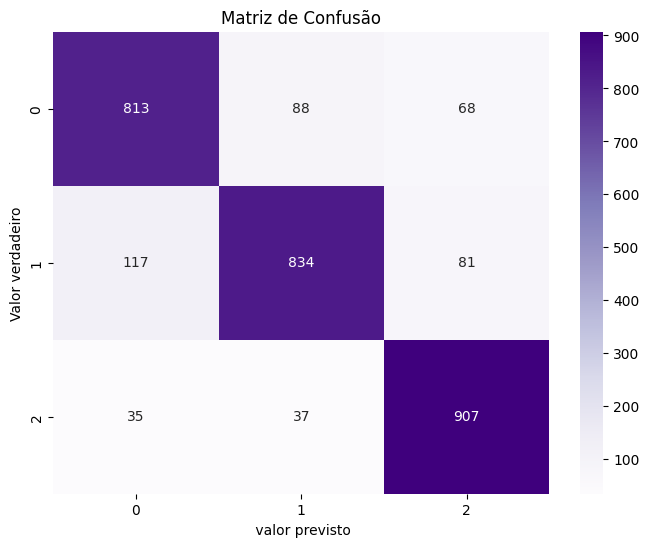

In [ ]:
plotarMatriz(matrizTransformers,"Purples")

Tamb√©m vale mencionar, que a rede Neural Word2VEC a matriz de confus√£o do modelo foi analisada, contendo 883 verdadeiros positivos, 628 falso positivos, 451 falso negativos e 1113 verdadeiros negativos. Indicando uma tend√™ncia do modelo a ter acertos mais precisos sobre coment√°rios negativos. Sendo esse um bom ind√≠cio, uma vez que essa √© a classe mais importante de ser corretamente classificada.

### 7.4 Conclus√£o

Os resultados que tiveram os melhores resultados foram o do Naive Bayes com Bag of words e a rede neural com Word2Vec. Sendo o menor deles o Naive Bayes com Word2Vec, uma vez que ele n√£o e um input adequado para o modelo.
Ja entre os dois modelos com maiores resultados, o que se destacou foi o Naive Bayes com bag of words, se destacando com 7% a mais de acur√°cia que a rede neural.
Tamb√©m sendo importante destacar a import√¢ncia da aplica√ß√£o de outras m√©tricas de avalia√ß√£o, como revoca√ß√£o, que identifica a rela√ß√£o entre Verdadeiros Positivos com Falsos Negativos.

## 8.0 Refer√™ncias

CHEN, D., NIGRI, E., OLIVEIRA, G.,SEPULVENE, L., ALVES, T.: M√©tricas de Avalia√ß√£o em Machine Learning: Classifica√ß√£o - Kunumi Blog, medium, 2020.

FRANCESCHI, P, R.: Modelagens Preditivas de Churn: O Caso do Banco do Brasil, Universidade do Vale do Rio dos Sinos, 2019.